## Predicting House Prices in Boston: A Machine Learning Exploration
This notebook outlines a guided approach to predicting house prices in Boston, Massachusetts, using machine learning techniques. This project leverages the well-established Boston Housing Dataset, a valuable resource for introductory machine learning exercises.

## Project Methodology:

### 1. Data Acquisition and Exploration:

Import the Boston Housing Dataset. Conduct a thorough exploration of the data, including:
* Identifying and understanding the features (independent variables) that might influence house prices (dependent variable).
* Analyzing data distribution, identifying potential outliers or missing values.
* Visualizing relationships between features and the target variable using techniques like scatter plots and heatmaps.

*Context*
The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.

Attribute Information
Input features in order:
1. CRIM: per capita crime rate by town
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS: proportion of non-retail business acres per town
4. CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. NOX: nitric oxides concentration (parts per 10 million) [parts/10M]
6. RM: average number of rooms per dwelling
7. AGE: proportion of owner-occupied units built prior to 1940
8. DIS: weighted distances to five Boston employment centres
9. RAD: index of accessibility to radial highways
10. TAX: full-value property-tax rate per $10,000 [$/10k]
11. PTRATIO: pupil-teacher ratio by town
12. B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT: % lower status of the population

Output variable:
1. MEDV: Median value of owner-occupied homes in $1000's [k$]

Source
StatLib - Carnegie Mellon University

Relevant Papers
Harrison, David & Rubinfeld, Daniel. (1978). Hedonic housing prices and the demand for clean air. Journal of Environmental Economics and Management. 5. 81-102. 10.1016/0095-0696(78)90006-2. LINK

Belsley, David A. & Kuh, Edwin. & Welsch, Roy E. (1980). Regression diagnostics: identifying influential data and sources of collinearity. New York: Wiley LINK




### 2. Data Preprocessing:

* Address missing values through techniques like imputation or removal (based on data specifics).
* Employ feature scaling or normalization to ensure all features are on a similar scale and contribute equally to model training.

## Model Selection and Training:

Choose an appropriate machine learning model for predicting house prices. This could involve:
* Considering linear regression for its interpretability when dealing with a continuous target variable like price.
* Exploring non-linear models like decision trees or random forests for potentially complex relationships between features and prices.
* Split the data into training and testing sets. The training set will be used to train the model, and the testing set will be used to evaluate its performance on unseen data.
* Train the chosen model on the training data, allowing it to learn the underlying patterns and relationships within the data.

## Model Evaluation:

Evaluate the model's performance on the testing set using metrics like mean squared error or R-squared. These metrics provide insights into how accurately the model predicts house prices for unseen data.
Consider visualization techniques like error histograms to gain a deeper understanding of the prediction errors and potential areas for improvement.

## Hyperparameter Tuning (Optional):

If necessary, we will explore hyperparameter tuning to optimize the chosen model's performance. This can involve adjusting model parameters to potentially improve its generalizability and accuracy.

## Model Interpretation (if using interpretable models):

If a model with interpretable features like linear regression is chosen, analyze the learned coefficients to understand the relative impact of each feature on house price predictions.



In [1]:
#import the necessary modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:


# Import the data

df = pd.read_csv("drive/MyDrive/AIML/boston-house-prices/boston.csv")

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
# Check for missing values
df.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


Let's explore individual features

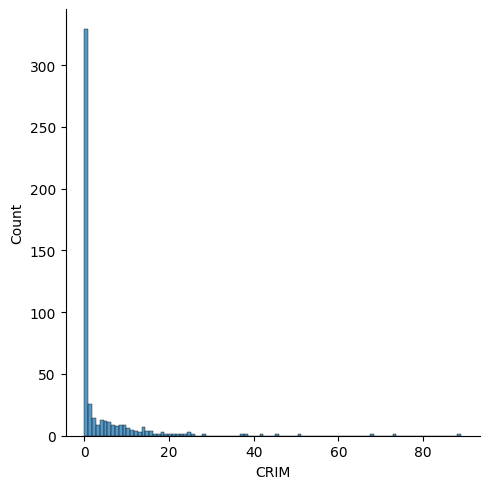

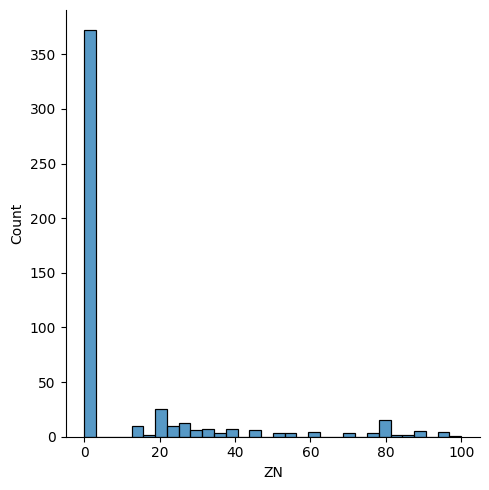

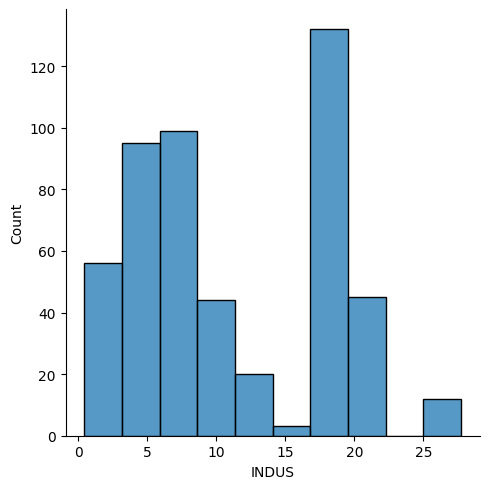

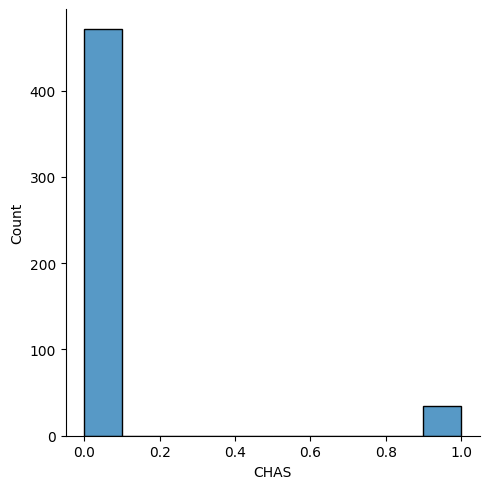

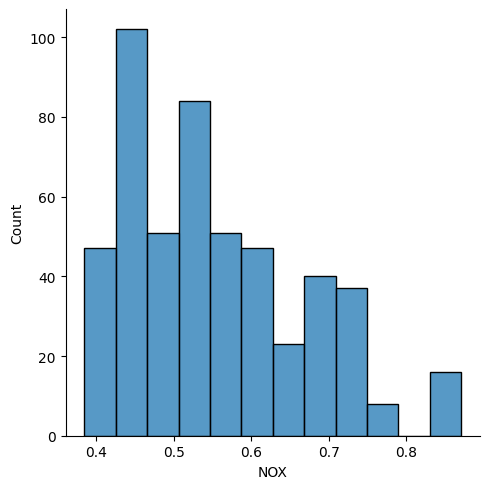

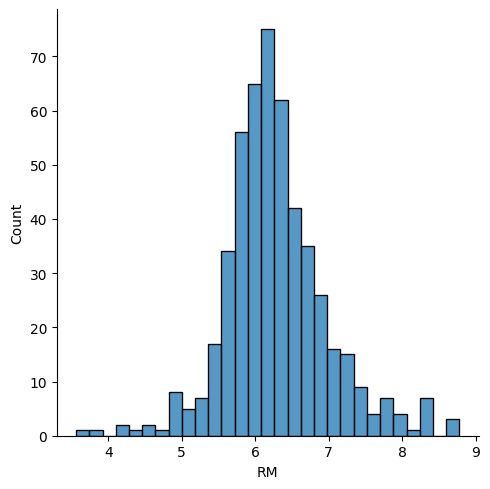

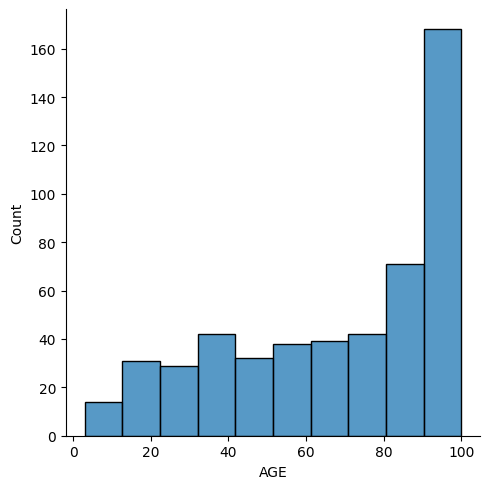

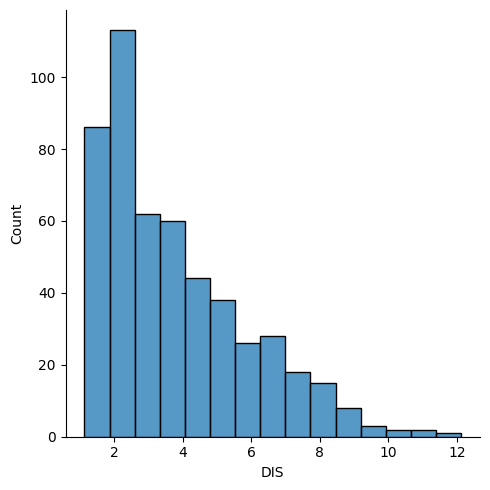

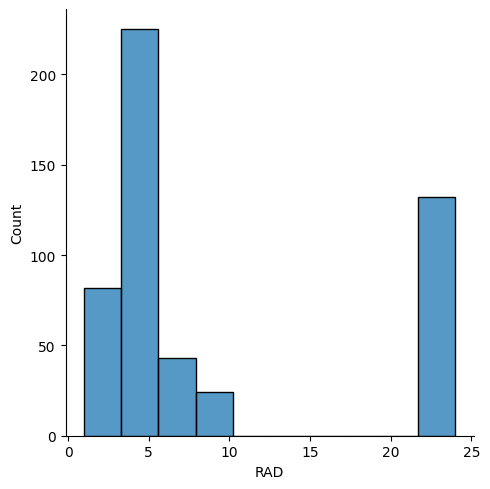

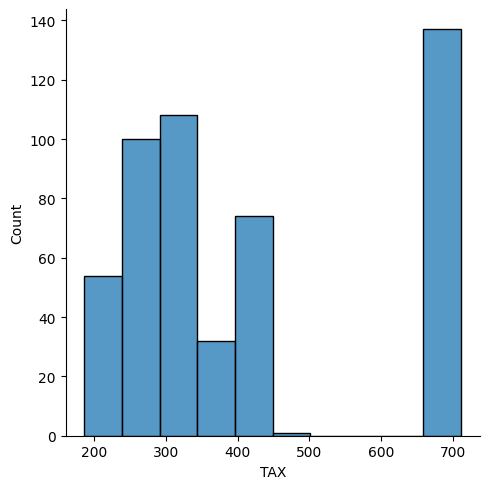

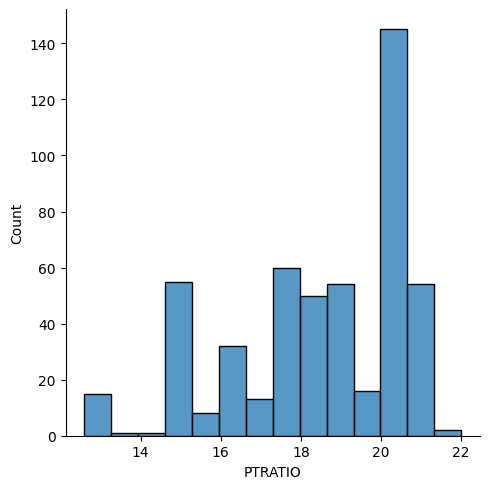

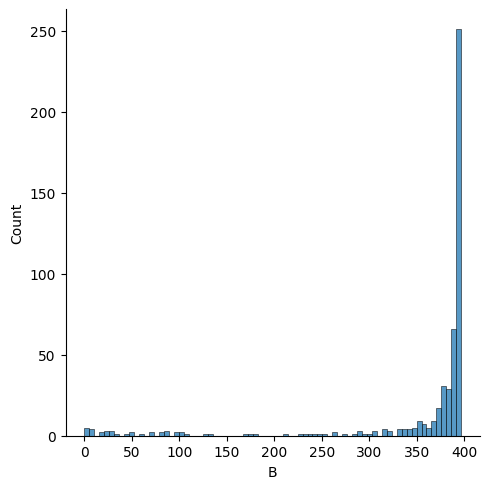

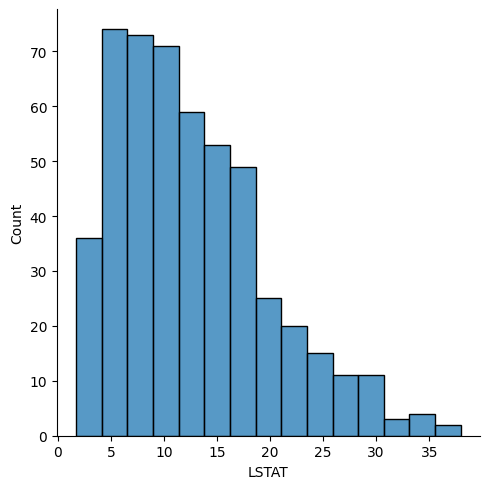

In [7]:
# Example for house size
import seaborn as sns
from seaborn import displot
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
for i in features:
  displot(df[i])
  plt.show();

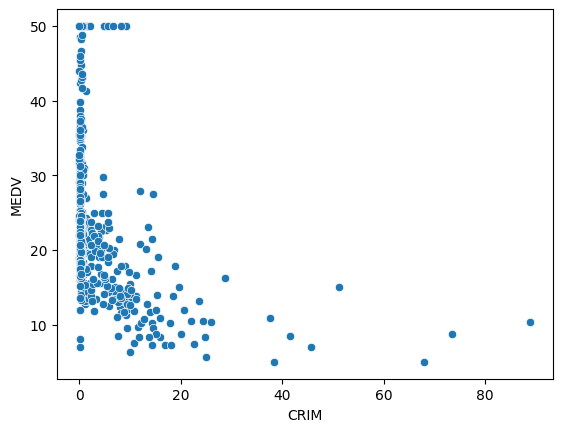

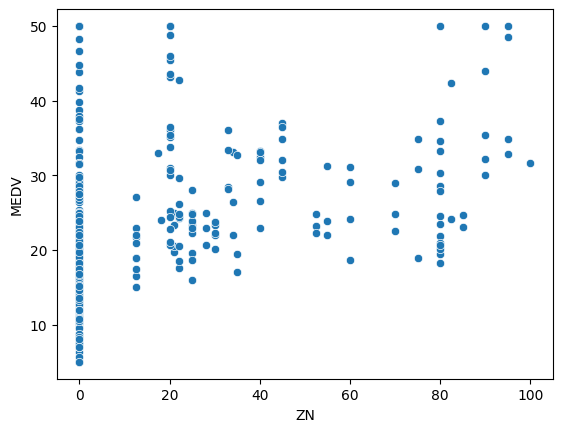

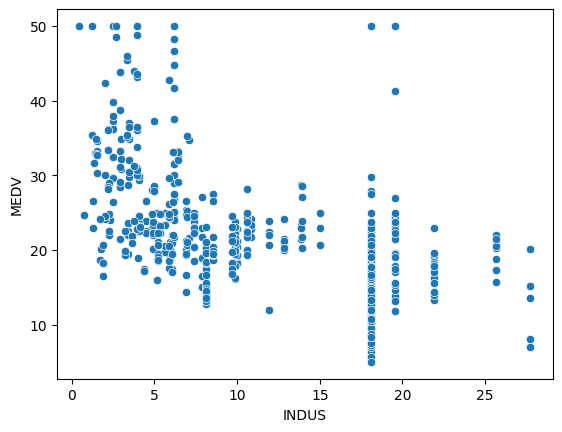

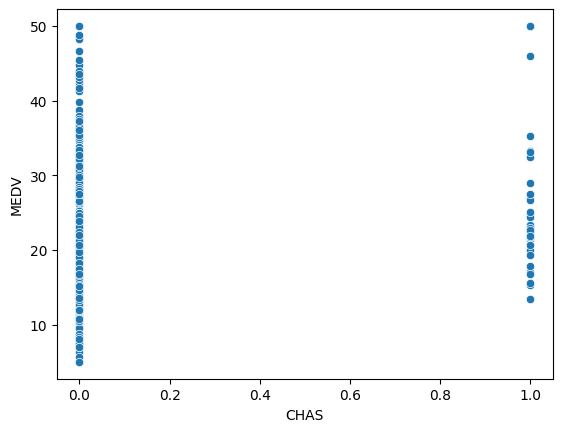

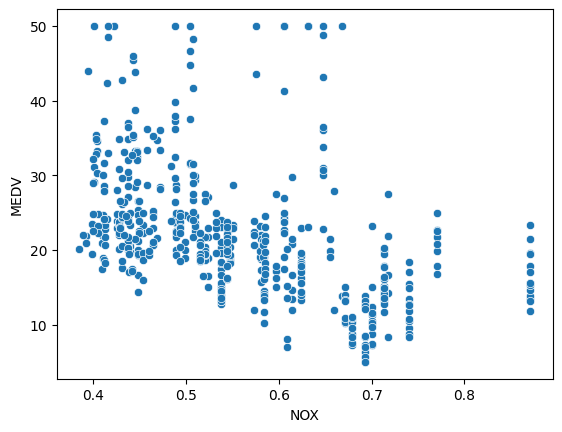

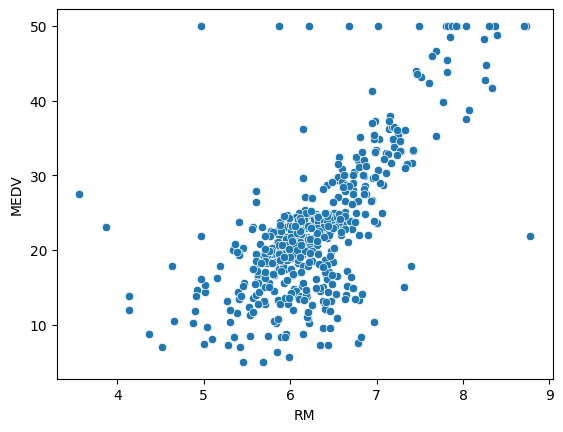

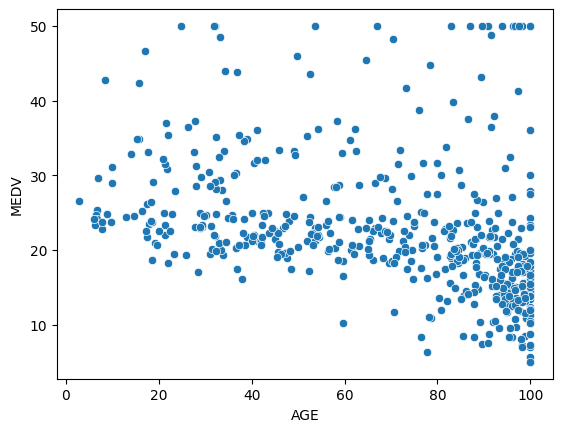

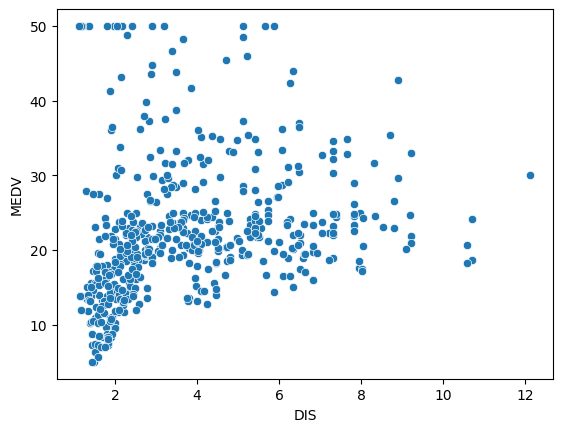

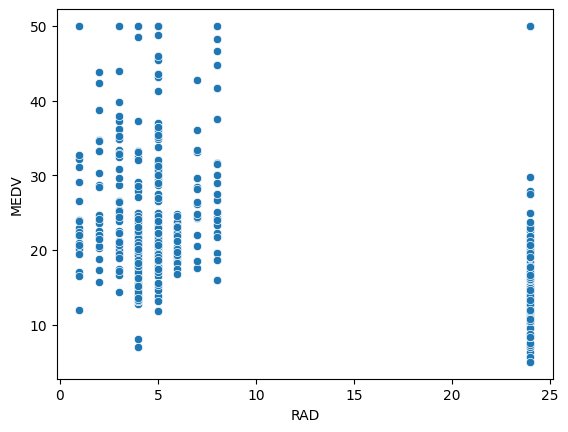

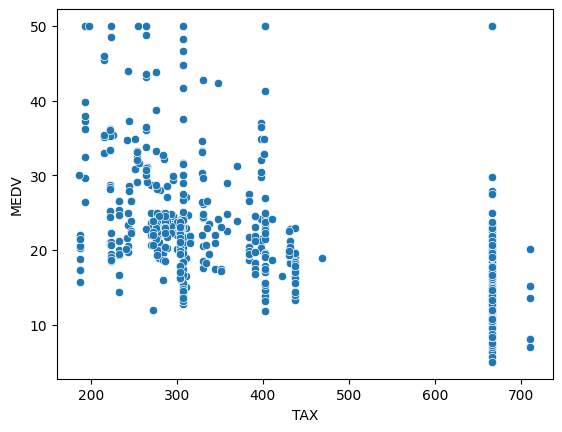

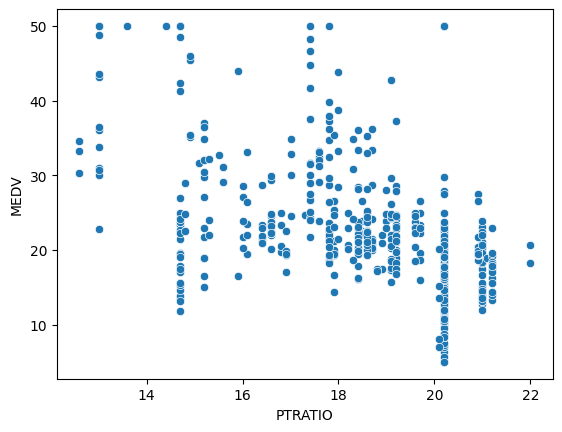

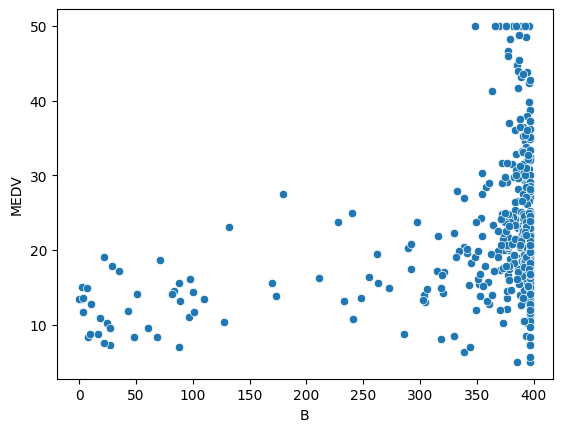

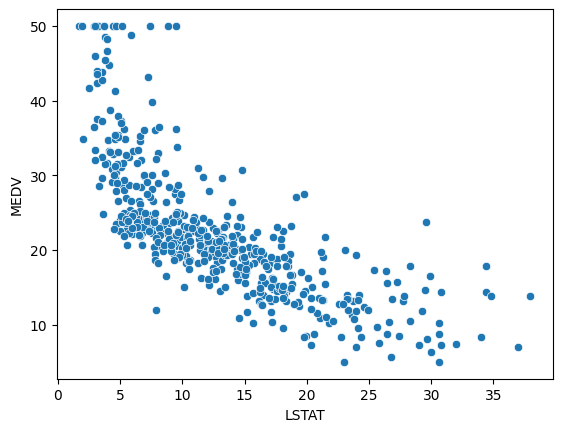

In [8]:
# Explore the relationship between features and price
for i in features:

  sns.scatterplot(x=i, y='MEDV', data=df)
  plt.show()

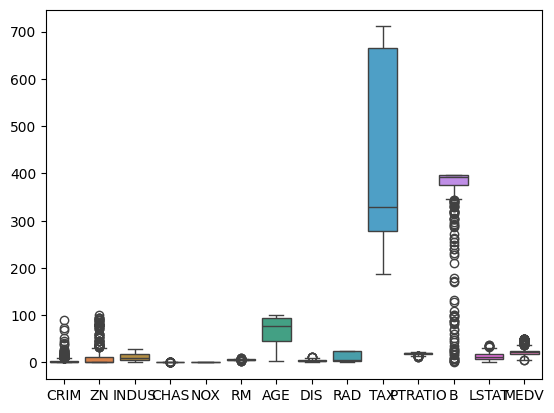

In [9]:
#identify outliers
# Example using boxplots
sns.boxplot(data=df)
plt.show()

In [10]:
# Assign the features (independent variables) and target variable (dependent variable)
X = df.drop('MEDV', axis=1)
y = df['MEDV']

We wil scale our features for better performance. We will use botht he standard scaler and MinMax scaler and compare both using different models.

In [11]:
# Linear regression with standard scaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split



In [12]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
linear_model = LinearRegression()
standard_scaler = StandardScaler()
minmax_scaler = scaler = MinMaxScaler(feature_range=(0, 1))

In [15]:
X_train_standard = standard_scaler.fit_transform(X_train)
X_test_standard = standard_scaler.transform(X_test)
X_train_minmax = minmax_scaler.fit_transform(X_train)
X_test_minmax = minmax_scaler.transform(X_test)

In [16]:
linear_model.fit(X_train_standard, y_train)

LinearRegression()

In [17]:
y_preds_train = linear_model.predict (X_train_standard)
y_preds_test = linear_model.predict (X_test_standard)

In [18]:
linear_model.score(X_train_standard, y_train)


0.7508856358979672

In [19]:
linear_model.score(X_test_standard, y_test)

0.668759493535632

In [20]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [21]:
linear_model.score(X_train, y_train)

0.7508856358979673

In [22]:
linear_model.score(X_train, y_train)

0.7508856358979673

This shows that we have better results without using scaled features

In [23]:
# Import the models
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Put the models in a dictionary
models = {
    "Ridge": Ridge(),
    "SVR": SVR(),
    "KNeighborsRegressor": KNeighborsRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor()
}

In [24]:
#fit and score the different models in one function
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {name: {'train_mae': [], 'test_mae': [], 'train_r2': [], 'test_r2': [], 'train_acc': [], 'test_acc': []} for name, model in models.items()}

    # Loop through the models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        y_train_preds = model.predict(X_train)
        y_test_preds = model.predict(X_test)

        # Calculate scores
        train_mae = mean_absolute_error(y_train, y_train_preds)
        test_mae = mean_absolute_error(y_test, y_test_preds)
        train_r2 = r2_score(y_train, y_train_preds)
        test_r2 = r2_score(y_test, y_test_preds)
        train_acc = model.score(X_train, y_train)
        test_acc = model.score(X_test, y_test)

        # Append scores to the dictionary
        model_scores[name]['train_mae'].append(train_mae)
        model_scores[name]['test_mae'].append(test_mae)
        model_scores[name]['train_r2'].append(train_r2)
        model_scores[name]['test_r2'].append(test_r2)
        model_scores[name]['train_acc'].append(train_acc)
        model_scores[name]['test_acc'].append(test_acc)



    return model_scores

In [25]:
model_scores = fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

{'Ridge': {'train_mae': [3.30030678868507],
  'test_mae': [3.1329474278055343],
  'train_r2': [0.7487825119234439],
  'test_r2': [0.6662221670168523],
  'train_acc': [0.7487825119234439],
  'test_acc': [0.6662221670168523]},
 'SVR': {'train_mae': [5.494752175356368],
  'test_mae': [4.530585721759495],
  'train_r2': [0.18534909298887647],
  'test_r2': [0.27948125010200275],
  'train_acc': [0.18534909298887647],
  'test_acc': [0.27948125010200275]},
 'KNeighborsRegressor': {'train_mae': [3.6084158415841583],
  'test_mae': [3.6639215686274507],
  'train_r2': [0.6839203981935851],
  'test_r2': [0.6473640882039258],
  'train_acc': [0.6839203981935851],
  'test_acc': [0.6473640882039258]},
 'DecisionTreeRegressor': {'train_mae': [0.0],
  'test_mae': [2.764705882352941],
  'train_r2': [1.0],
  'test_r2': [0.6912024289250192],
  'train_acc': [1.0],
  'test_acc': [0.6912024289250192]},
 'RandomForestRegressor': {'train_mae': [0.899153465346534],
  'test_mae': [2.0434117647058825],
  'train_r2':

In [26]:
# Plot the different figures
def plot_model_scores(model_scores):
    metrics = ['train_mae', 'test_mae', 'train_r2', 'test_r2', 'train_acc', 'test_acc']
    n_metrics = len(metrics)

    fig, axs = plt.subplots(n_metrics, 1, figsize=(10, 20), sharex=True)

    if n_metrics == 1:
        axs = [axs]

    for idx, metric in enumerate(metrics):
        for model_name, scores in model_scores.items():
            axs[idx].bar(model_name, scores[metric][0], label=model_name)
        axs[idx].set_title(metric.replace('_', ' ').capitalize())
        axs[idx].set_ylabel(metric.replace('_', ' ').capitalize())
        axs[idx].legend()

    plt.tight_layout()
    plt.show()

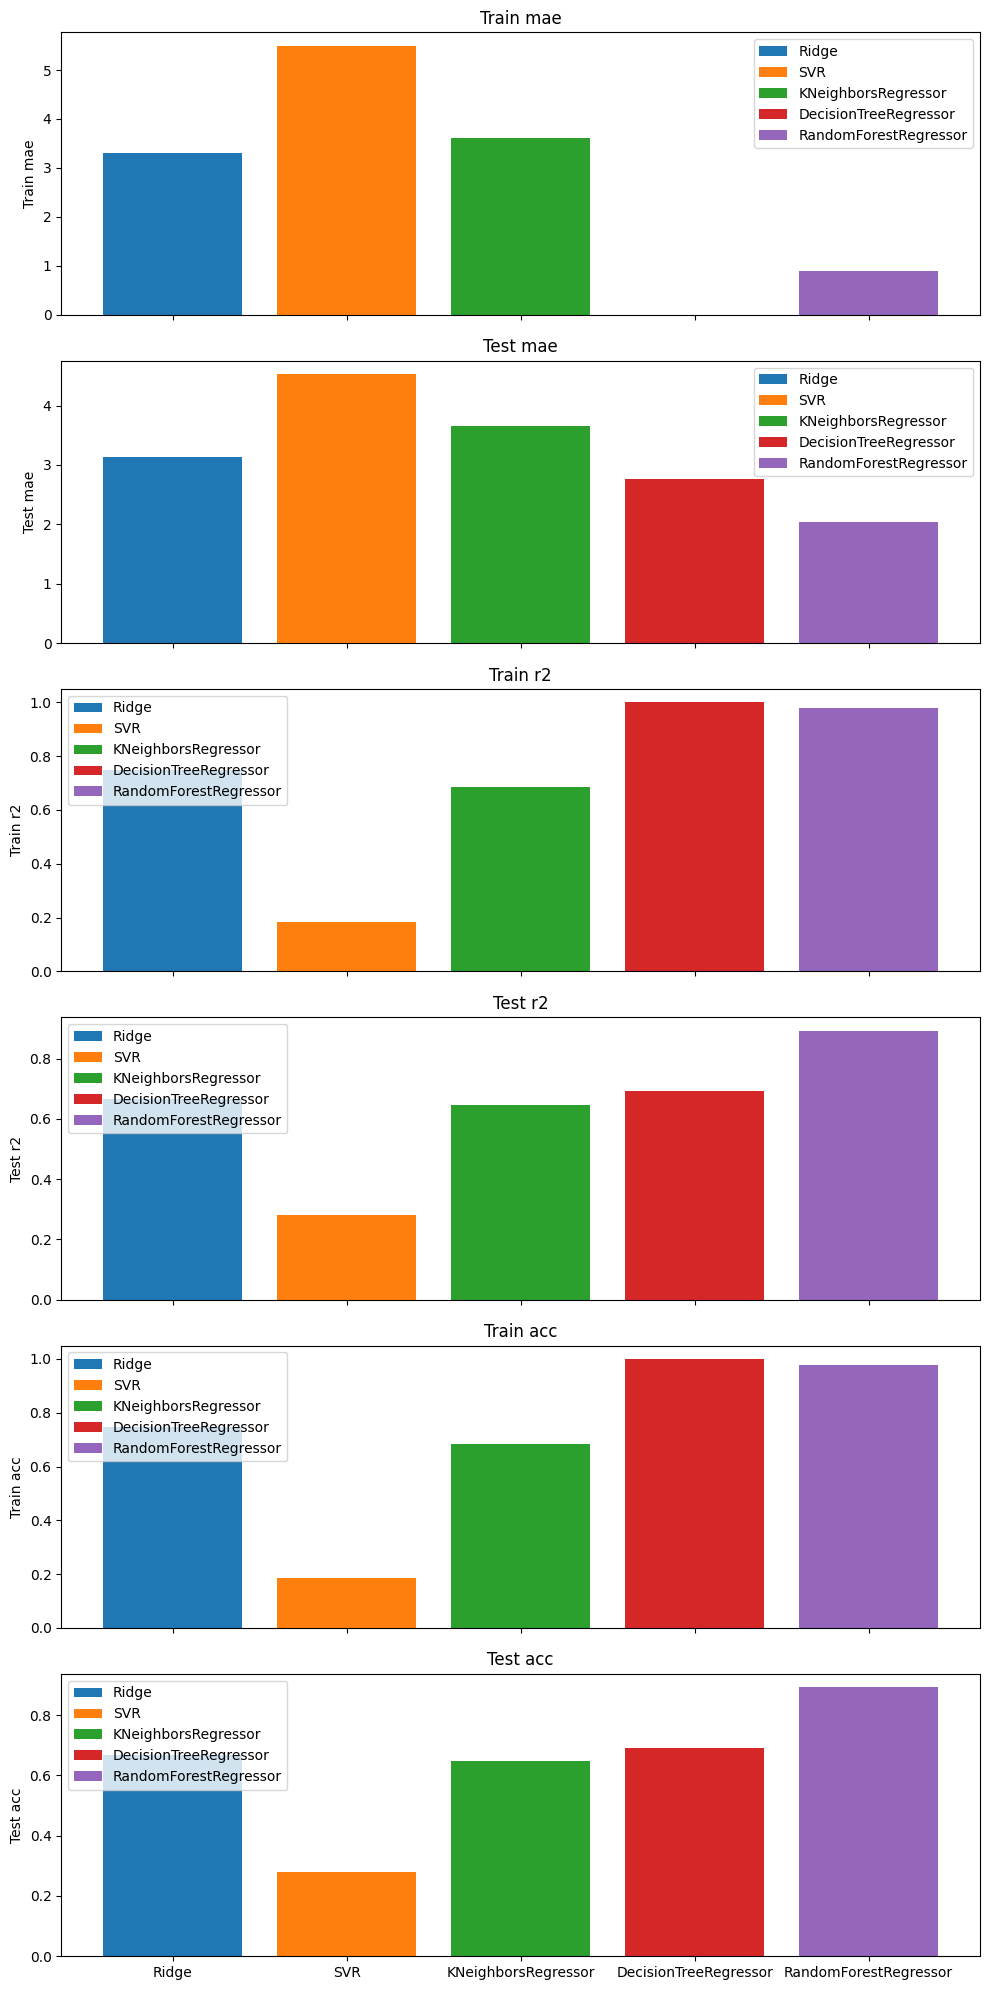

In [27]:
plot_model_scores(model_scores)